✅ Data loaded successfully.
 Available columns: ['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', '

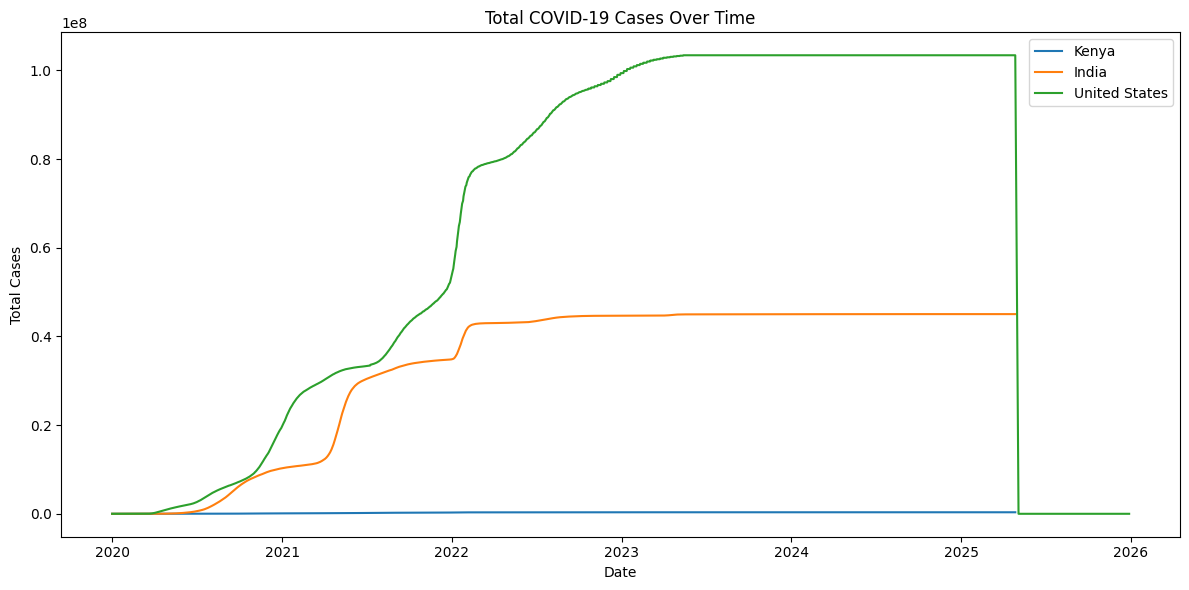

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loading Data
file_path = "data/owid covid data.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

try:
    df = pd.read_csv(file_path)
    print(" Data loaded successfully.")
except Exception as e:
    raise RuntimeError(f"Error loading CSV: {e}")

# Checking columns and converting date
print(" Available columns:", df.columns.tolist())

if 'date' not in df.columns or 'country' not in df.columns:
    raise KeyError("Required columns ('date', 'country') not found in dataset.")


df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

# Filtering Countries
countries = ['Kenya', 'India', 'United States']

# Previewing available countries
print(" Sample locations:", df['country'].dropna().unique()[:10])

df = df[df['country'].isin(countries)]

if df.empty:
    raise ValueError(" No data found for selected countries.")

df = df.fillna(0)
print(f" Filtered data shape: {df.shape}")

# Ploting Total Cases
plt.figure(figsize=(12, 6))

for country in countries:
    country_df = df[df['country'] == country]
    if not country_df.empty:
        plt.plot(country_df['date'], country_df['total_cases'], label=country)
    else:
        print(f"⚠️ No data for {country}")

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


## 📈 Key Insights from COVID-19 Data

1. **The United States** experienced the highest total cases overall.
2. **India** showed major spikes in mid-2021, likely due to the Delta variant.
3. **Kenya** had fewer reported cases, possibly due to lower testing/reporting.
4. **Vaccination rates** were significantly higher in the U.S. compared to Kenya.

### 🔍 Observations
- Gaps in data suggest underreporting in some regions.
- Patterns align with global waves and vaccination timelines.
